https://github.com/caserec/CaseRecommender/wiki/Getting-Started

In [1]:
import numpy as np

In [ ]:
from caserec.recommenders.item_recommendation.content_based import ContentBased
from caserec.recommenders.item_recommendation.item_attribute_knn import ItemAttributeKNN

train = '../../datasets/ml-100k/folds/0/train.dat'
test = '../../datasets/ml-100k/folds/0/test.dat'
rank_cb = '../../datasets/ml-100k/folds/0/rank_cb.dat'
rank_attr = '../../datasets/ml-100k/folds/0/rank_attr.dat'
similarity = '../../datasets/ml-100k/folds/0/vsm.dat'
top_n = 10
metrics = ('PREC', 'RECALL', 'NDCG', 'MAP')

ItemAttributeKNN(train, test, similarity_file=similarity, output_file=rank_attr, rank_length=50).\
    compute(metrics=metrics, n_ranks=[10, 20, 50])
ContentBased(train, test, similarity_file=similarity, output_file=rank_cb, rank_length=50).\
    compute(metrics=metrics, n_ranks=[10, 20, 50])

In [ ]:
from caserec.utils.split_database import SplitDatabase
SplitDatabase(input_file=dataset, dir_folds=dir_path, n_splits=10).kfoldcrossvalidation()  

In [ ]:
from caserec.recommenders.item_recommendation.itemknn import ItemKNN
ItemKNN(train_file, test_file).compute()

_____________

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

### Importando Dataset

In [3]:
folder = "../../Datasets/movieLens/100k_raw/"
dataset = "{}u.data".format(folder)
output_folder = './outputs/'
dataset_output_folder = output_folder + 'movieLens/100k/'

# Visualize file content
df = pd.read_csv(dataset, sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
# Obtaing movie information
movies_info = "{}u.item".format(folder)
mv_df = pd.read_csv(movies_info, sep='|', header=None, encoding = "ISO-8859-1")
mv_df = mv_df[[0,1]]
mv_df.columns = ['item_id', 'title']

mv_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Divide Dataset into Kfold

In [5]:
# Make the import
from caserec.utils.split_database import SplitDatabase

In [6]:
import os
if not os.path.exists(dataset_output_folder):
    os.makedirs(dataset_output_folder)

In [7]:
# input_file -> Input file with at least 2 columns (users and items)
# dir_folds  -> Directory to write folds (train and test files)
# n_splits   -> How much folds the strategy will divide
n_folds = 5
SplitDatabase(input_file=dataset, dir_folds=dataset_output_folder, n_splits=n_folds).k_fold_cross_validation()

## Generating ranks with Case Recommender

In [8]:
folder_0 = "{}/folds/0/".format(dataset_output_folder)
train = "{}train.dat".format(folder_0)
test = "{}test.dat".format(folder_0)

# File to write the predicted ranking
ranking = "{}ranking.dat".format(folder_0)

In [9]:
# Make the import
from caserec.recommenders.item_recommendation.itemknn import ItemKNN

In [10]:
# train_file  -> File which contains the train set. 
# test_file   -> File which contains the test set.
# output_file -> File with dir to write the final predictions

model = ItemKNN(train_file=train, test_file=test, output_file=ranking,  rank_length=10)

Using value of K as 15, correlation as similarity measure and evaluation the results only with NDCG

In [11]:
ItemKNN(train_file=train, test_file=test, output_file=ranking, k_neighbors=15, similarity_metric='correlation'
       ).compute(metrics=['NDCG'])

[Case Recommender: Item Recommendation > ItemKNN Algorithm]

train data:: 943 users and 1661 items (80000 interactions) | sparsity:: 94.89%
test data:: 942 users and 1379 items (20000 interactions) | sparsity:: 98.46%

training_time:: 2.916604 sec
prediction_time:: 16.974609 sec


Eval:: NDCG@1: 0.416136 NDCG@3: 0.617502 NDCG@5: 0.613295 NDCG@10: 0.607952 


### Visualization of the results

Movies watched by user with id 438

In [ ]:
# Marging information

train_df = pd.read_csv(train, sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'time'])
train_df = train_df.merge(mv_df)
train_df_user1 = train_df[train_df['user_id'] == 438]
train_df_user1.reset_index(inplace=True, drop=True)
train_df_user1

Movies recommended for user with id 438

In [ ]:
ranking_df = pd.read_csv(ranking, sep='\t', header=None, names=['user_id', 'item_id', 'score'])
ranking_df = ranking_df.merge(mv_df)
ranking_df_user1 = ranking_df[ranking_df['user_id'] == 438]
ranking_df_user1.reset_index(inplace=True, drop=True)
ranking_df_user1

## Generating Predictions with Case Recommender

In [ ]:
folder_1 = "{}/folds/1/".format(dataset_output_folder)
train = "{}train.dat".format(folder_1)
test = "{}test.dat".format(folder_1)

# File to write the predicted ranking
predictions = "{}predictions.dat".format(folder_1)

In [ ]:
# Make the import
from caserec.recommenders.rating_prediction.itemknn import ItemKNN

In [ ]:
# train_file  -> File which contains the train set. 
# test_file   -> File which contains the test set.
# output_file -> File with dir to write the final predictions

y = ItemKNN(train_file=train, test_file=test, output_file=predictions).compute()

### Visualizing the results

Evaluating the rank for user with id = 8

In [ ]:
# Marging information

test_df = pd.read_csv(test, sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'time'])
test_df = test_df.merge(mv_df)

test_df_user8 = test_df[test_df['user_id'] == 8]
test_df_user8.reset_index(inplace=True, drop=True)
test_df_user8

Rating prediction for the user 8 for the same movies 

In [ ]:
predictions_df = pd.read_csv(predictions, sep='\t', header=None, names=['user_id', 'item_id', 'score'])
predictions_df = predictions_df.merge(mv_df)

predictions_df_user8 = predictions_df[predictions_df['user_id'] == 8]
predictions_df_user8.reset_index(inplace=True, drop=True)
predictions_df_user8

## ItemKNN
https://github.com/caserec/CaseRecommender/blob/master/caserec/recommenders/item_recommendation/itemknn.py

Item Based Collaborative Filtering Recommender (Item KNN)
    
Item KNN predicts a user’s ranking based on similar items which him/her access.

In [219]:
from caserec.recommenders.item_recommendation.itemknn import ItemKNN
top_n = 10
fold_number = '0'

k_neighbors = 30
fold_folder = "{}folds/{}/".format(dataset_output_folder, fold_number)
train = "{}train.dat".format(fold_folder)
test = "{}test.dat".format(fold_folder)
rank_cb = "{}rank_cb.dat".format(fold_folder)
rank_attr = "{}rank_attr.dat".format(fold_folder)
similarity = "{}vsm.dat".format(fold_folder)
metrics = ('PREC', 'RECALL', 'NDCG', 'MAP')

model = ItemKNN(train_file=train, 
                test_file=test, 
#                 as_binary=True, # If True, the explicit feedback will be transform to binary
                k_neighbors=k_neighbors,
                similarity_metric='cosine',
                rank_length=top_n)


In [220]:
metrics = ('Prec', 'Recall', 'NDCG', 'MAP')

model.compute(metrics=None, 
             as_table=True,
             n_ranks=[top_n])

[Case Recommender: Item Recommendation > ItemKNN Algorithm]

train data:: 943 users and 1651 items (80000 interactions) | sparsity:: 94.86%
test data:: 942 users and 1404 items (20000 interactions) | sparsity:: 98.49%

training_time:: 2.872298 sec
prediction_time:: 20.142112 sec


PREC@10	RECALL@10	MAP@10	NDCG@10	
0.327282	0.200777	0.526182	0.641745	


In [221]:
df_ranks_topn = pd.DataFrame(model.ranking, columns = ['user_id', 'item_id', 'rank'])

In [227]:
# model.ranking[:top_n]
partial_sps = 0
sps = 0
rank = 3
for user_id in df_ranks_topn['user_id'].unique():        
    partial_sps = 1 if df_ranks_topn[df_ranks_topn['user_id'] == user_id]['item_id'].reset_index(drop=True)[rank] in df_test[df_test['user_id'] == user_id]['item_id'] else 0  
    sps = sps + partial_sps

print (sps)

3


In [55]:
pd.read_csv(test, sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'time']).head()

,user_id,item_id,rating,time
0,1,9,5,878543541
1,1,15,5,875071608
2,1,17,3,875073198
3,1,26,3,875072442
4,1,35,1,878542420


In [77]:
model.test_set #.get(0, [])

In [71]:
#model.test_set

# list(model.test_set['items_seen_by_user'][1])#[0]
model.test_set['items_seen_by_user'][1]

{9,
 15,
 17,
 26,
 35,
 36,
 38,
 51,
 56,
 62,
 67,
 69,
 70,
 76,
 78,
 84,
 88,
 89,
 93,
 108,
 115,
 117,
 124,
 127,
 134,
 135,
 144,
 147,
 151,
 152,
 153,
 155,
 156,
 159,
 164,
 165,
 167,
 169,
 170,
 173,
 177,
 185,
 186,
 190,
 192,
 196,
 201,
 202,
 206,
 212,
 214,
 216,
 217,
 219,
 221,
 245,
 250,
 253,
 260,
 268}

### Running best k neighbor analysis

In [141]:
%%time
step_size = 2
arr_k_neighbors = np.arange(4, 51, step_size)
arr_n_folds = np.arange(0, n_folds, 1)

all_folds_map = []
all_folds_map_topn = []
all_folds_ndcg_topn = []
all_folds_prec_topn = []
all_folds_recall_topn = []

for k_neighbors in arr_k_neighbors:
    print ("Processing neighbours " + str(k_neighbors))
    
    k_neighbors_map = []
    k_neighbors_map_topn = []
    k_neighbors_ndcg_topn = []
    k_neighbors_prec_topn = []
    k_neighbors_recall_topn = []
    
    for n_fold in arr_n_folds:
        fold_folder = "{}folds/{}/".format(dataset_output_folder, n_fold)
        train = "{}train.dat".format(fold_folder)
        test = "{}test.dat".format(fold_folder)
        
        model = ItemKNN(
                    train_file=train, 
                    test_file=test, 
    #                 as_binary=True, # If True, the explicit feedback will be transform to binary
                    k_neighbors=k_neighbors,
                    similarity_metric='cosine',
                    rank_length=top_n)
        
        model.compute(
            metrics=None, 
            as_table=True,
            n_ranks=[top_n],
            verbose=False)
        
        eval_results = model.evaluation_results
        
        k_neighbors_map.append(eval_results['MAP'])
        k_neighbors_map_topn.append(eval_results['MAP@' + str(top_n)])
        k_neighbors_ndcg_topn.append(eval_results['NDCG@' + str(top_n)])
        k_neighbors_prec_topn.append(eval_results['PREC@' + str(top_n)])
        k_neighbors_recall_topn.append(eval_results['RECALL@' + str(top_n)])
        
    all_folds_map.append(k_neighbors_map)
    all_folds_map_topn.append(k_neighbors_map_topn)
    all_folds_ndcg_topn.append(k_neighbors_ndcg_topn)
    all_folds_prec_topn.append(k_neighbors_prec_topn)
    all_folds_recall_topn.append(k_neighbors_recall_topn)

Processing neighbours 4
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.268047	0.167212	0.467241	0.589527	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.270426	0.180411	0.463259	0.59234	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.271095	0.182398	0.47898	0.599043	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.268936	0.170625	0.461564	0.582094	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.269745	0.17164	0.474259	0.597189	
Processing neighbours 6
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.284607	0.176012	0.480703	0.605361	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.28117	0.181039	0.4782	0.600971	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.287141	0.189081	0.485042	0.611865	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.281064	0.17475	0.471879	0.591739	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.285244	0.185008	0.485757	0.609097	
Processing neighbours 8
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.293206	0.182316	0.486715	0.606499	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.290957	0.188459	0.491314	0.617156	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.298512	0.198905	0.503419	0.629996	
PREC@10	RECA

PREC@10	RECALL@10	MAP@10	NDCG@10	
0.326221	0.204249	0.516948	0.634476	
Processing neighbours 48
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.329193	0.202534	0.542579	0.662255	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.32266	0.2038	0.530961	0.649345	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.336769	0.213104	0.537038	0.656114	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.332234	0.206449	0.526044	0.640465	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.325265	0.201846	0.518843	0.633574	
Processing neighbours 50
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.330042	0.203885	0.538233	0.656401	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.324255	0.2053	0.529421	0.647749	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.33932	0.217	0.538938	0.652674	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.331277	0.204886	0.525302	0.642174	
PREC@10	RECALL@10	MAP@10	NDCG@10	
0.329193	0.205888	0.521561	0.635804	
Wall time: 56min 51s


'5_folds_map_at_10_neigh_5_to_35_by_5'

In [142]:
import joblib
filename = '{}_folds_{}_at_{}_neigh_{}_to_{}_by_{}.joblib'.format(n_folds, 'map', top_n, arr_k_neighbors[0], arr_k_neighbors[-1], step_size)
joblib.dump(all_folds_map_topn, dataset_output_folder + filename)
filename = '{}_folds_{}_at_{}_neigh_{}_to_{}_by_{}.joblib'.format(n_folds, 'recall', top_n, arr_k_neighbors[0], arr_k_neighbors[-1], step_size)
joblib.dump(all_folds_recall_topn, dataset_output_folder + filename)
filename = '{}_folds_{}_at_{}_neigh_{}_to_{}_by_{}.joblib'.format(n_folds, 'prec', top_n, arr_k_neighbors[0], arr_k_neighbors[-1], step_size)
joblib.dump(all_folds_prec_topn, dataset_output_folder + filename)
filename = '{}_folds_{}_at_{}_neigh_{}_to_{}_by_{}.joblib'.format(n_folds, 'ndcg', top_n, arr_k_neighbors[0], arr_k_neighbors[-1], step_size)
joblib.dump(all_folds_ndcg_topn, dataset_output_folder + filename)

['./outputs/movieLens/100k/5_folds_ndcg_at_10_neigh_4_to_50_by_2.joblib']

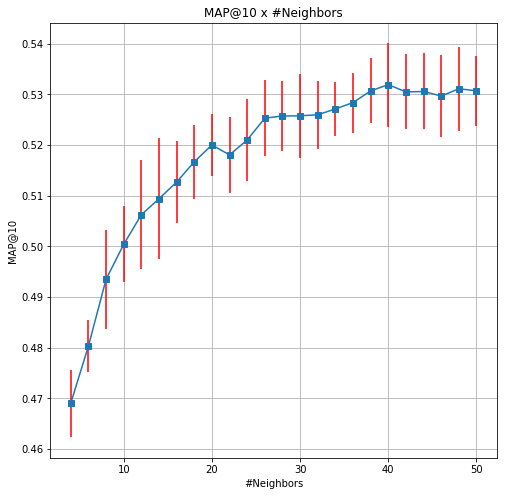

In [143]:
def plot_k_neighbors(all_folds_metric_topn, arr_k_neighbors, metric, filename = None):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,8))
    x = arr_k_neighbors
    y = np.array([np.mean(x) for x in all_folds_metric_topn])
    y_std = np.array([np.std(x) for x in all_folds_metric_topn])
    # ax.plot(x, y)
    ax.scatter(x, y)
    ax.errorbar(x, y, y_std, ecolor='red', marker = 's')
    ax.set_title(metric + ' x #Neighbors')
    ax.set_xlabel('#Neighbors')
    ax.set_ylabel(metric)
    ax.grid()
    
    if (filename is not None):
        plt.savefig(filename)

filename = '{}_folds_{}_at_{}_neigh_{}_to_{}_by_{}.jpeg'.format(n_folds, 'map', top_n, arr_k_neighbors[0], arr_k_neighbors[-1], step_size)
filename = dataset_output_folder + filename
plot_k_neighbors(all_folds_map_topn, arr_k_neighbors, 'MAP@' + str(top_n), filename)

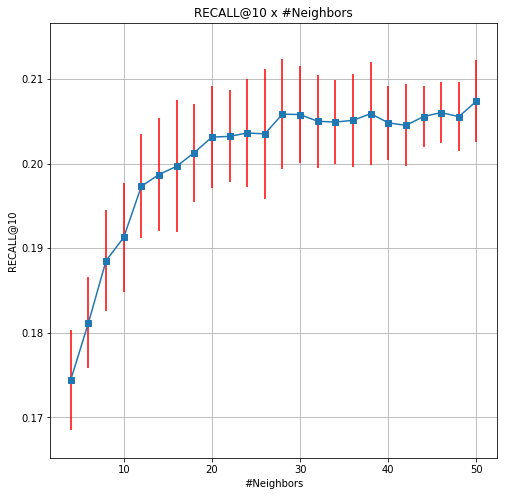

In [146]:
filename = '{}_folds_{}_at_{}_neigh_{}_to_{}_by_{}.jpeg'.format(n_folds, 'recall', top_n, arr_k_neighbors[0], arr_k_neighbors[-1], step_size)
filename = dataset_output_folder + filename
plot_k_neighbors(all_folds_recall_topn, arr_k_neighbors, 'RECALL@' + str(top_n), filename)

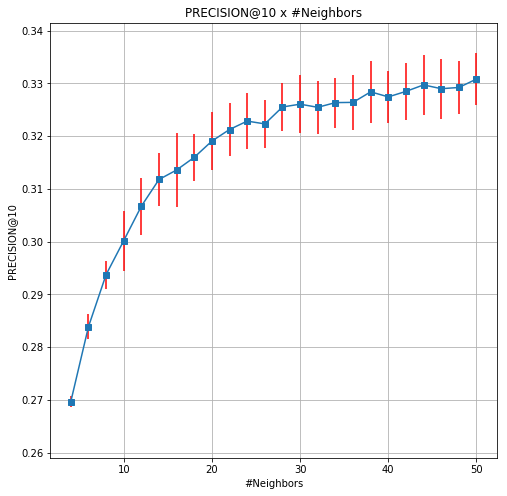

In [147]:
filename = '{}_folds_{}_at_{}_neigh_{}_to_{}_by_{}.jpeg'.format(n_folds, 'precision', top_n, arr_k_neighbors[0], arr_k_neighbors[-1], step_size)
filename = dataset_output_folder + filename
plot_k_neighbors(all_folds_prec_topn, arr_k_neighbors, 'PRECISION@' + str(top_n), filename)

## Most Popular

In [152]:
from caserec.recommenders.item_recommendation.most_popular import MostPopular
from caserec.utils.cross_validation import CrossValidation


In [157]:
fold_folder = "{}folds/{}/".format(dataset_output_folder, n_fold)
train = "{}train.dat".format(fold_folder)
test = "{}test.dat".format(fold_folder)

model = MostPopular(train, 
                    test, 
                    as_binary=False,                   
                    rank_length=top_n)



In [160]:
model.compute(
    metrics=None, 
    as_table=True,
#     n_ranks=[top_n],
    verbose=True)

[Case Recommender: Item Recommendation > Most Popular]

train data:: 943 users and 1650 items (80000 interactions) | sparsity:: 94.86%
test data:: 942 users and 1411 items (20000 interactions) | sparsity:: 98.50%

prediction_time:: 13.983361 sec


PREC@1	PREC@3	PREC@5	PREC@10	RECALL@1	RECALL@3	RECALL@5	RECALL@10	MAP@1	MAP@3	MAP@5	MAP@10	NDCG@1	NDCG@3	NDCG@5	NDCG@10	
0.27707	0.222576	0.196815	0.179618	0.015523	0.03668	0.054521	0.100302	0.27707	0.34908	0.357978	0.345915	0.27707	0.417979	0.444686	0.466152	


In [161]:
model.evaluation_results

{'MAP': 0.345915,
 'MAP@1': 0.27707,
 'MAP@10': 0.345915,
 'MAP@3': 0.34908,
 'MAP@5': 0.357978,
 'NDCG@1': 0.27707,
 'NDCG@10': 0.466152,
 'NDCG@3': 0.417979,
 'NDCG@5': 0.444686,
 'PREC@1': 0.27707,
 'PREC@10': 0.179618,
 'PREC@3': 0.222576,
 'PREC@5': 0.196815,
 'RECALL@1': 0.015523,
 'RECALL@10': 0.100302,
 'RECALL@3': 0.03668,
 'RECALL@5': 0.054521}

In [165]:
df_ranks_topn = pd.DataFrame(model.ranking, columns = ['user_id', 'item_id', 'rank'])

In [173]:
# df_test = 
df_test = pd.read_csv(test, sep = '\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])

In [203]:
df_test[df_test['user_id'] == 2]['item_id']

48      1
49     25
50    272
51    274
52    276
53    279
54    282
55    284
56    286
57    288
58    290
59    296
60    304
Name: item_id, dtype: int64

In [210]:
# df_test[df_test['user_id'] == 1]['item_id'].reset_index(drop = True)
df_test[df_test['user_id'] == user_id]

,user_id,item_id,rating,timestamp


In [218]:
partial_sps = 0
sps = 0
for user_id in df_test['user_id'].unique():    
    print (sps, partial_sps)
    partial_sps = 1 if df_test[df_test['user_id'] == user_id]['item_id'].reset_index(drop=True)[0] in df_ranks_topn[df_ranks_topn['user_id'] == user_id]['item_id'] else 0
    sps = sps + partial_sps

0 0
1 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0


In [216]:
sps

1

## ItemAttributeKNN

Item Based Collaborative Filtering Recommender with Attributes (Item Attribute KNN)
    
Its philosophy is as follows: in order to determine the rating of User u on item m, we can find other movies that are similar to item m, and based on User u’s ratings on those similar movies we infer his rating on item m.
    
However, instead of traditional ItemKNN, this approach uses a metadata or pre-computed similarity matrix.

In [18]:
from caserec.recommenders.item_recommendation.item_attribute_knn import ItemAttributeKNN

In [33]:
fold_number = '0'
fold_folder = "{}folds/{}/".format(dataset_output_folder, fold_number)
train = "{}train.dat".format(fold_folder)
test = "{}test.dat".format(fold_folder)
rank_cb = "{}rank_cb.dat".format(fold_folder)
rank_attr = "{}rank_attr.dat".format(fold_folder)
similarity = "{}vsm.dat".format(fold_folder)
top_n = 10
metrics = ('PREC', 'RECALL', 'NDCG', 'MAP')

model = ItemAttributeKNN(train_file=train, 
                 test_file=test, 
#                  similarity_file=similarity, 
                metadata_similarity_sep='\t', 
                metadata_file=output_folder + 'metadata_file.csv',                
                 output_file=rank_attr, 
                 rank_length=top_n)
#     compute(metrics=metrics, n_ranks=[10, 20, 50])

In [ ]:
model.create_matrix()

In [ ]:
model.output_file

In [ ]:
model.compute_similarity()

In [30]:
output_folder

'./outputs/'

In [32]:
mv_df.to_csv(output_folder + 'metadata_file.csv', columns=['item_id', 'title'], sep = '\t')

In [46]:
import numpy as np
np.arange(0, 5, 1)


array([0, 1, 2, 3, 4])

In [50]:
df_sim = pd.DataFrame(columns=['item_id_1', 'item_id_2', 'sim'])

In [57]:
df_sim = df_sim.append({'item_id_1': 1, 'item_id_2': 2, 'sim': 5}, ignore_index=True)

,item_id_1,item_id_2,sim
0,1,2,5


In [59]:
sim_matrix[1, 1]

1.0

In [62]:

for item_x in np.arange(1, len(model.item_to_item_id), 1):    
    for item_y in np.arange(1, len(model.item_to_item_id), 1):    
        df_sim = df_sim.append({'item_id_1': model.item_to_item_id[item_x], 'item_id_2': model.item_to_item_id[item_y], 'sim': sim_matrix[model.item_to_item_id[item_x], model.item_to_item_id[item_y]]}, 
                               ignore_index=True)
        if (item_y > item_x):
            break
        

KeyboardInterrupt: 

In [34]:
model.compute(metrics=metrics, n_ranks=top_n)

[Case Recommender: Item Recommendation > Item Attribute KNN Algorithm]

train data:: 943 users and 1661 items (80000 interactions) | sparsity:: 94.89%
test data:: 942 users and 1379 items (20000 interactions) | sparsity:: 98.46%



ValueError: invalid literal for int() with base 10: ''

In [10]:
from caserec.recommenders.rating_prediction.svdplusplus import SVDPlusPlus
from caserec.recommenders.rating_prediction.matrixfactorization import MatrixFactorization
from caserec.utils.cross_validation import CrossValidation

In [11]:
fold_number = '0'
fold_folder = "{}folds/{}/".format(dataset_output_folder, fold_number)
train = "{}train.dat".format(fold_folder)
test = "{}test.dat".format(fold_folder)

db = '../../datasets/ml-100k/u.data'
folds_path = '../../datasets/ml-100k/'

metadata_item = '../../datasets/ml-100k/db_item_subject.dat'
sm_item = '../../datasets/ml-100k/sim_item.dat'
metadata_user = '../../datasets/ml-100k/metadata_user.dat'
sm_user = '../../datasets/ml-100k/sim_user.dat'

tr = '../../datasets/ml-100k/folds/0/train.dat'
te = '../../datasets/ml-100k/folds/0/test.dat'


In [13]:

# Cross Validation
# recommender = MatrixFactorization()

# CrossValidation(input_file=db, recommender=recommender, dir_folds=folds_path, header=1, k_folds=5).compute()

# Simple
model = MatrixFactorization(train, test)
# SVDPlusPlus(tr, te).compute()

In [21]:
model.compute(metrics = ['MAP'])

[Case Recommender: Rating Prediction > Matrix Factorization]

train data:: 943 users and 1657 items (80000 interactions) | sparsity:: 94.88%
test data:: 940 users and 1401 items (20000 interactions) | sparsity:: 98.48%

training_time:: 4.755904 sec
prediction_time:: 0.036900 sec




KeyError: 'MAP'

In [20]:
model.evaluate(metrics = ['RMSE'], as_rank = True)

TypeError: evaluate() got an unexpected keyword argument 'as_rank'

In [41]:
from caserec.evaluation.item_recommendation import precision_at_k
precision_at_k(np.array(df_user['rating']), 10)

1.0

In [50]:
list_feedback = set(list(model.predictions.get(1, []))[:n])
#intersection = list(list_feedback.intersection(test_set['items_seen_by_user'].get(user, [])))

AttributeError: 'list' object has no attribute 'get'

In [32]:
df_predictions = pd.DataFrame(model.predictions, columns = ['user_id', 'item_id', 'rating'])
df_user = df_predictions[df_predictions['user_id'] == 1].sort_values(['rating'], ascending=False).reset_index(drop = True)

In [45]:
np.mean(np.array(df_user['rating'].loc[:10]))#.sort_values(['rating'], ascending=False)

4.3095690220042835

In [16]:
model.evaluate(metrics = ['RMSE', 'MAP'])

KeyError: 'MAP'

## BPRMF

In [57]:
from caserec.recommenders.item_recommendation.bprmf import BprMF

# tr = '../../datasets/ml-100k/folds/0/train.dat'
# te = '../../datasets/ml-100k/folds/0/test.dat'
top_n = 10

model = BprMF(train, test, batch_size=30, rank_length = top_n)#.compute()

In [54]:
model.compute(metrics = ['PREC'])

[Case Recommender: Item Recommendation > BPRMF]

train data:: 943 users and 1657 items (80000 interactions) | sparsity:: 94.88%
test data:: 940 users and 1401 items (20000 interactions) | sparsity:: 98.48%

training_time:: 2.224077 sec
prediction_time:: 0.982096 sec


Eval:: PREC@1: 0.217021 PREC@3: 0.193262 PREC@5: 0.185745 PREC@10: 0.156489 RECALL@1: 0.017564 RECALL@3: 0.045592 RECALL@5: 0.072926 RECALL@10: 0.121103 MAP@1: 0.217021 MAP@3: 0.304433 MAP@5: 0.328044 MAP@10: 0.326646 NDCG@1: 0.217021 NDCG@3: 0.385686 NDCG@5: 0.435804 NDCG@10: 0.460224 


In [61]:
metrics = ('Prec', 'Recall', 'NDCG', 'MAP')


model.compute(metrics=None, 
             as_table=True)

[Case Recommender: Item Recommendation > BPRMF]

train data:: 943 users and 1657 items (80000 interactions) | sparsity:: 94.88%
test data:: 940 users and 1401 items (20000 interactions) | sparsity:: 98.48%

training_time:: 2.689388 sec
prediction_time:: 1.125491 sec


PREC@1	PREC@3	PREC@5	PREC@10	RECALL@1	RECALL@3	RECALL@5	RECALL@10	MAP@1	MAP@3	MAP@5	MAP@10	NDCG@1	NDCG@3	NDCG@5	NDCG@10	
0.185106	0.205319	0.187872	0.157234	0.015407	0.050376	0.074052	0.120316	0.185106	0.306028	0.326875	0.323273	0.185106	0.415017	0.452651	0.470804	


In [59]:
model.evaluation_results

{'MAP': 0.334259,
 'MAP@1': 0.219149,
 'MAP@10': 0.334259,
 'MAP@3': 0.31117,
 'MAP@5': 0.339774,
 'NDCG@1': 0.219149,
 'NDCG@10': 0.470263,
 'NDCG@3': 0.397059,
 'NDCG@5': 0.455984,
 'PREC@1': 0.219149,
 'PREC@10': 0.162128,
 'PREC@3': 0.199291,
 'PREC@5': 0.194894,
 'RECALL@1': 0.018399,
 'RECALL@10': 0.123498,
 'RECALL@3': 0.049066,
 'RECALL@5': 0.074591}

In [90]:
from caserec.evaluation.rating_prediction import RatingPredictionEvaluation

evaluator = RatingPredictionEvaluation(sep = '\t', n_rank = [10], as_rank = True, metrics = ['PREC'])

In [66]:
model.predict()

In [67]:
evaluator.evaluate(model.predictions, model.test_set)

AttributeError: 'BprMF' object has no attribute 'predictions'

In [80]:
from caserec.recommenders.rating_prediction.matrixfactorization import MatrixFactorization

temp_filepath = './temp_file.dat'

model = MatrixFactorization(train, test, output_file = temp_filepath)

model.compute()

[Case Recommender: Rating Prediction > Matrix Factorization]

train data:: 943 users and 1657 items (80000 interactions) | sparsity:: 94.88%
test data:: 940 users and 1401 items (20000 interactions) | sparsity:: 98.48%

training_time:: 20.522973 sec
prediction_time:: 0.040890 sec


Eval:: MAE: 0.748833 RMSE: 0.954029 


In [76]:
predictions = model.predictions
test_set = model.test_set

In [81]:
from caserec.utils.process_data import ReadFile

reader = ReadFile(input_file=temp_filepath)

In [83]:
predictions = reader.read()

In [88]:
#model.test_set

In [99]:
ret = evaluator.evaluate(predictions['feedback'], model.test_set)
ret

Eval:: PREC@10: 0.559149 RECALL@10: 0.679663 MAP@10: 0.798988 NDCG@10: 0.862484 


{}

In [101]:
model.evaluation_results

{'MAE': 0.748833, 'RMSE': 0.954029}

In [100]:
model.predict()